# Evaluation and Plotting
## Evaluation
get describing data on database with SQL queries and save to input file for Word to keep information up to date.

In [1]:
from tristo.database import OpenDB
from tristo.database.get_data import get_data_for_pub

In [2]:
with OpenDB().session() as session:
    get_data_for_pub('scalar_values', session=session)

## Plotting
make plots for publication

In [1]:
from tristo.plotting import geoplot, violin_most_common, violin_common_org, plot_summary
from tristo.database import OpenDB, get_vals
import matplotlib.pyplot as plt
import pandas as pd
from tristo.paths import PATH_PLOTS

[WARNING]: Please supply 'chromedriver.exe' in 'g:/UBA_WIMI/1_TriSto/6_Veröffentlichung/supplementary' before scraping!
	-> Current versions can be found at 'https://chromedriver.chromium.org/downloads'.
g:\uba_wimi\1_tristo\4_skript_v2\tristo2\tristo\utils.py:123: FutureWarning: Possible nested set at position 1
  param = re.sub(pat, replacement, param, flags=re.I)
[ INFO  ]: pikepdf C++ to Python logger bridge initialized


## make plots except geographic and violin

c:\Users\Leon\anaconda3\envs\tristo_fs\lib\site-packages\pandas\io\sql.py:1405: SAWarning: SELECT statement has a cartesian product between FROM element(s) "response", "wvg_lau", "wvg" and FROM element "anon_1".  Apply join condition(s) between each element to resolve.
  return self.connectable.execution_options().execute(*args, **kwargs)
g:\uba_wimi\1_tristo\4_skript_v2\tristo2\tristo\plotting\plot_summary.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([f'{i:.0%}' for i in np.linspace(0,1,6)])


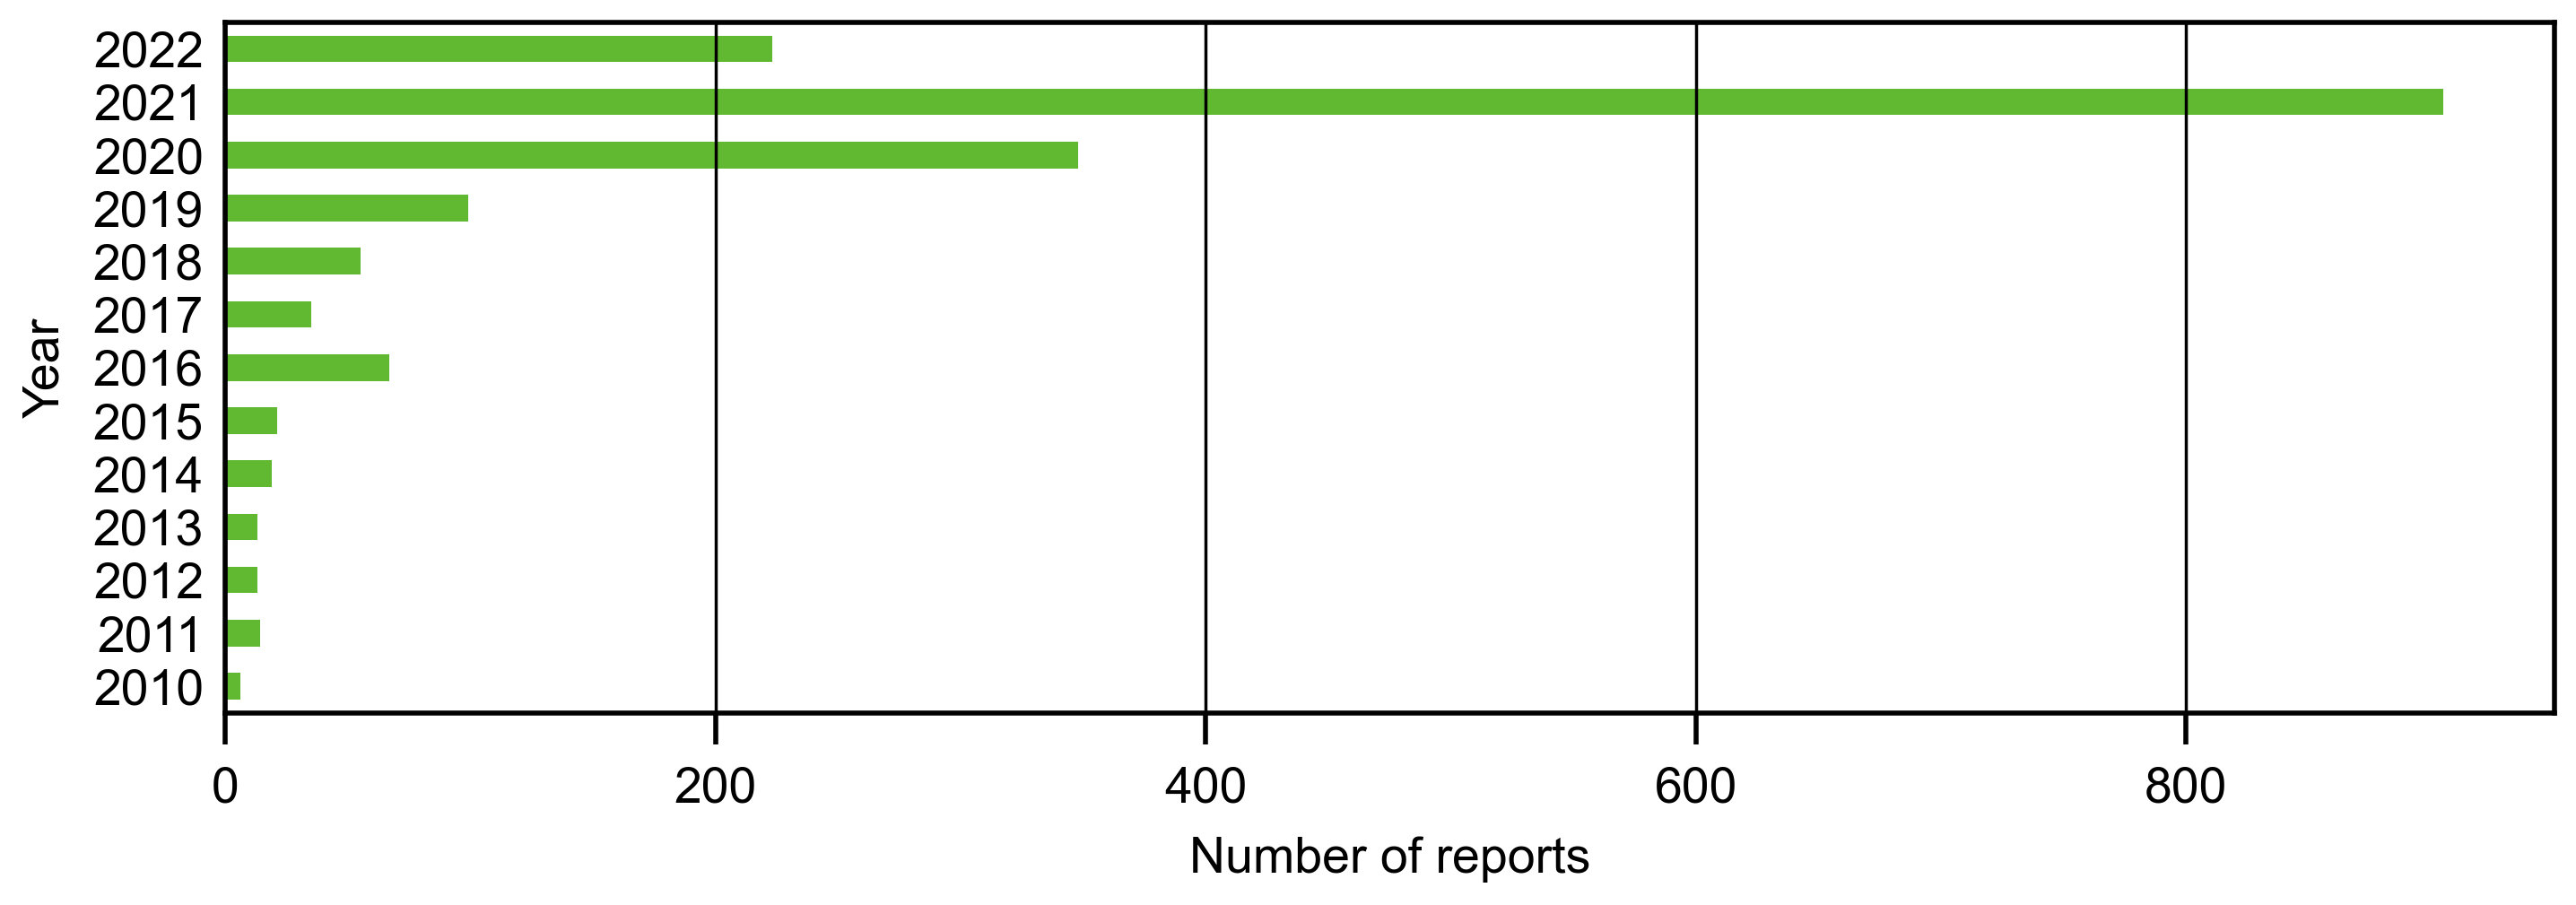

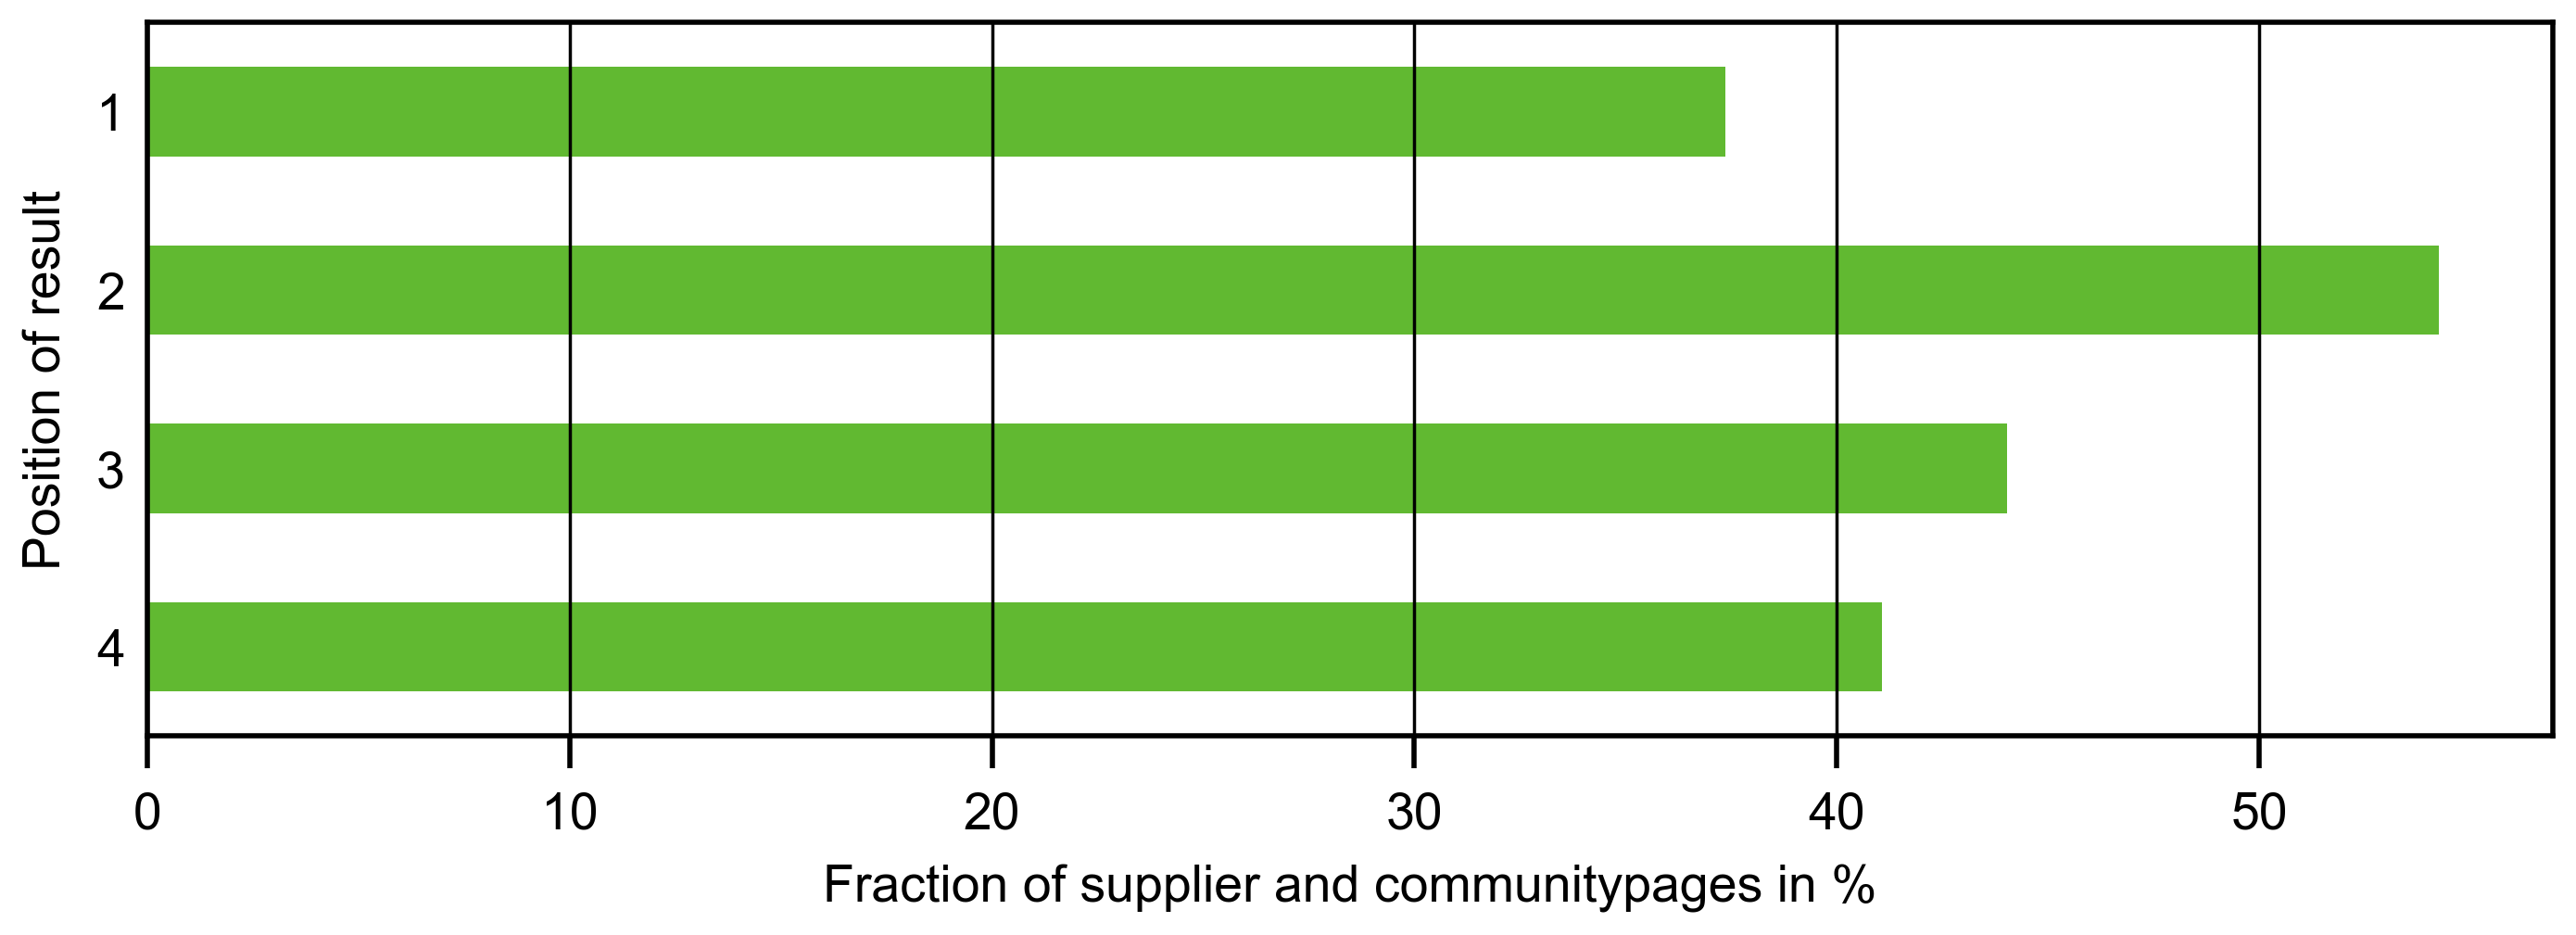

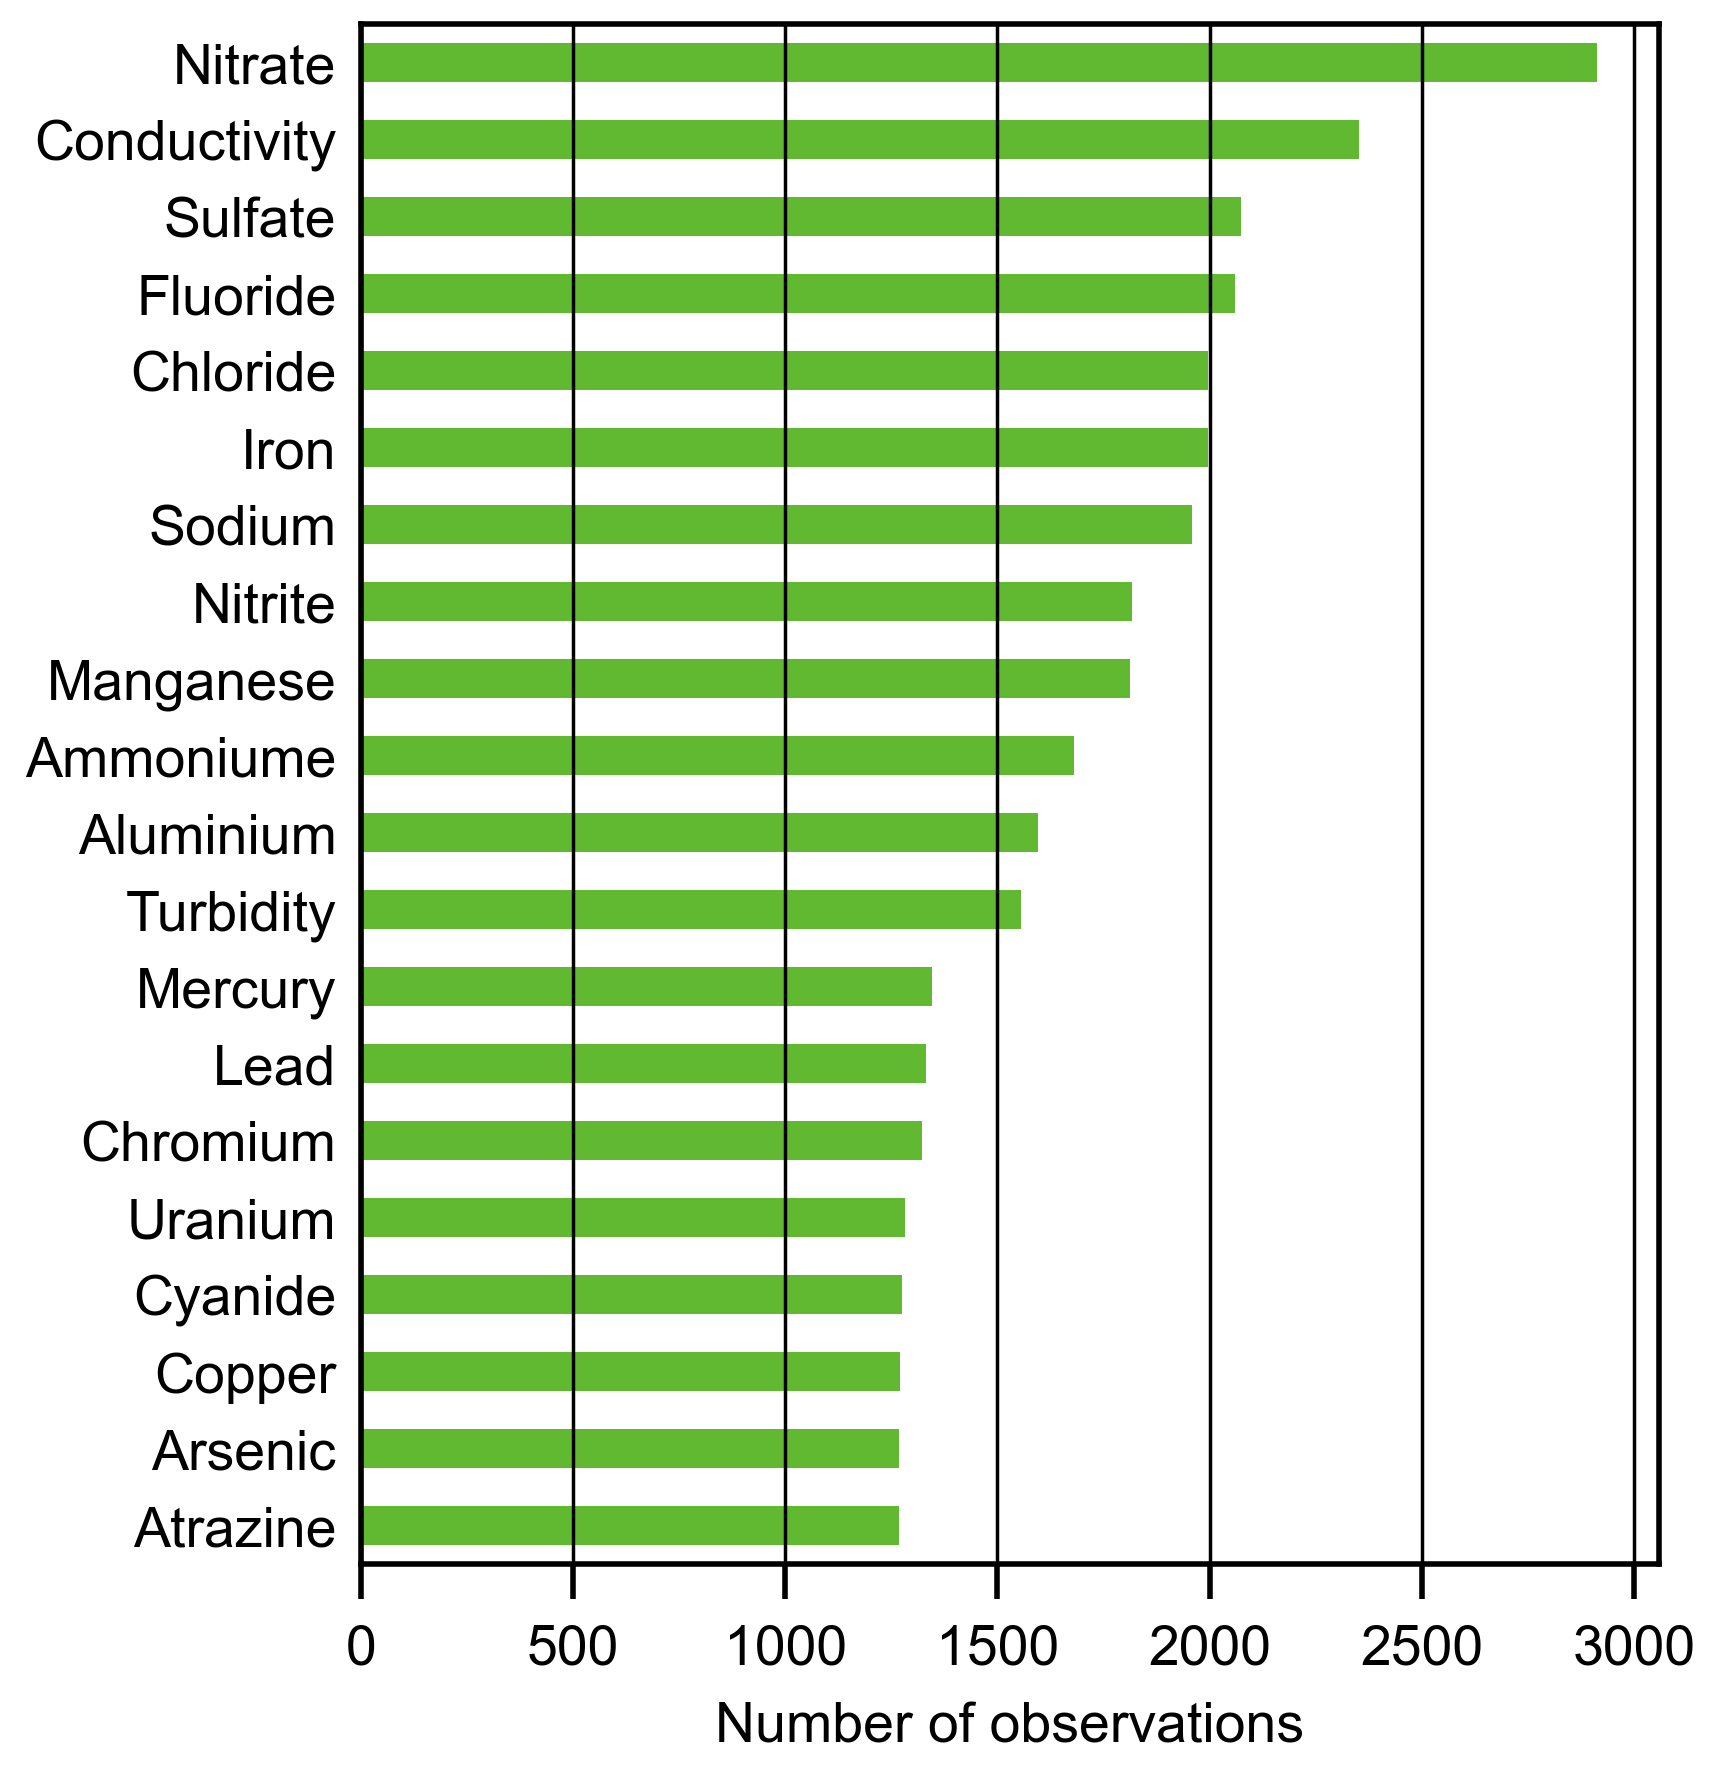

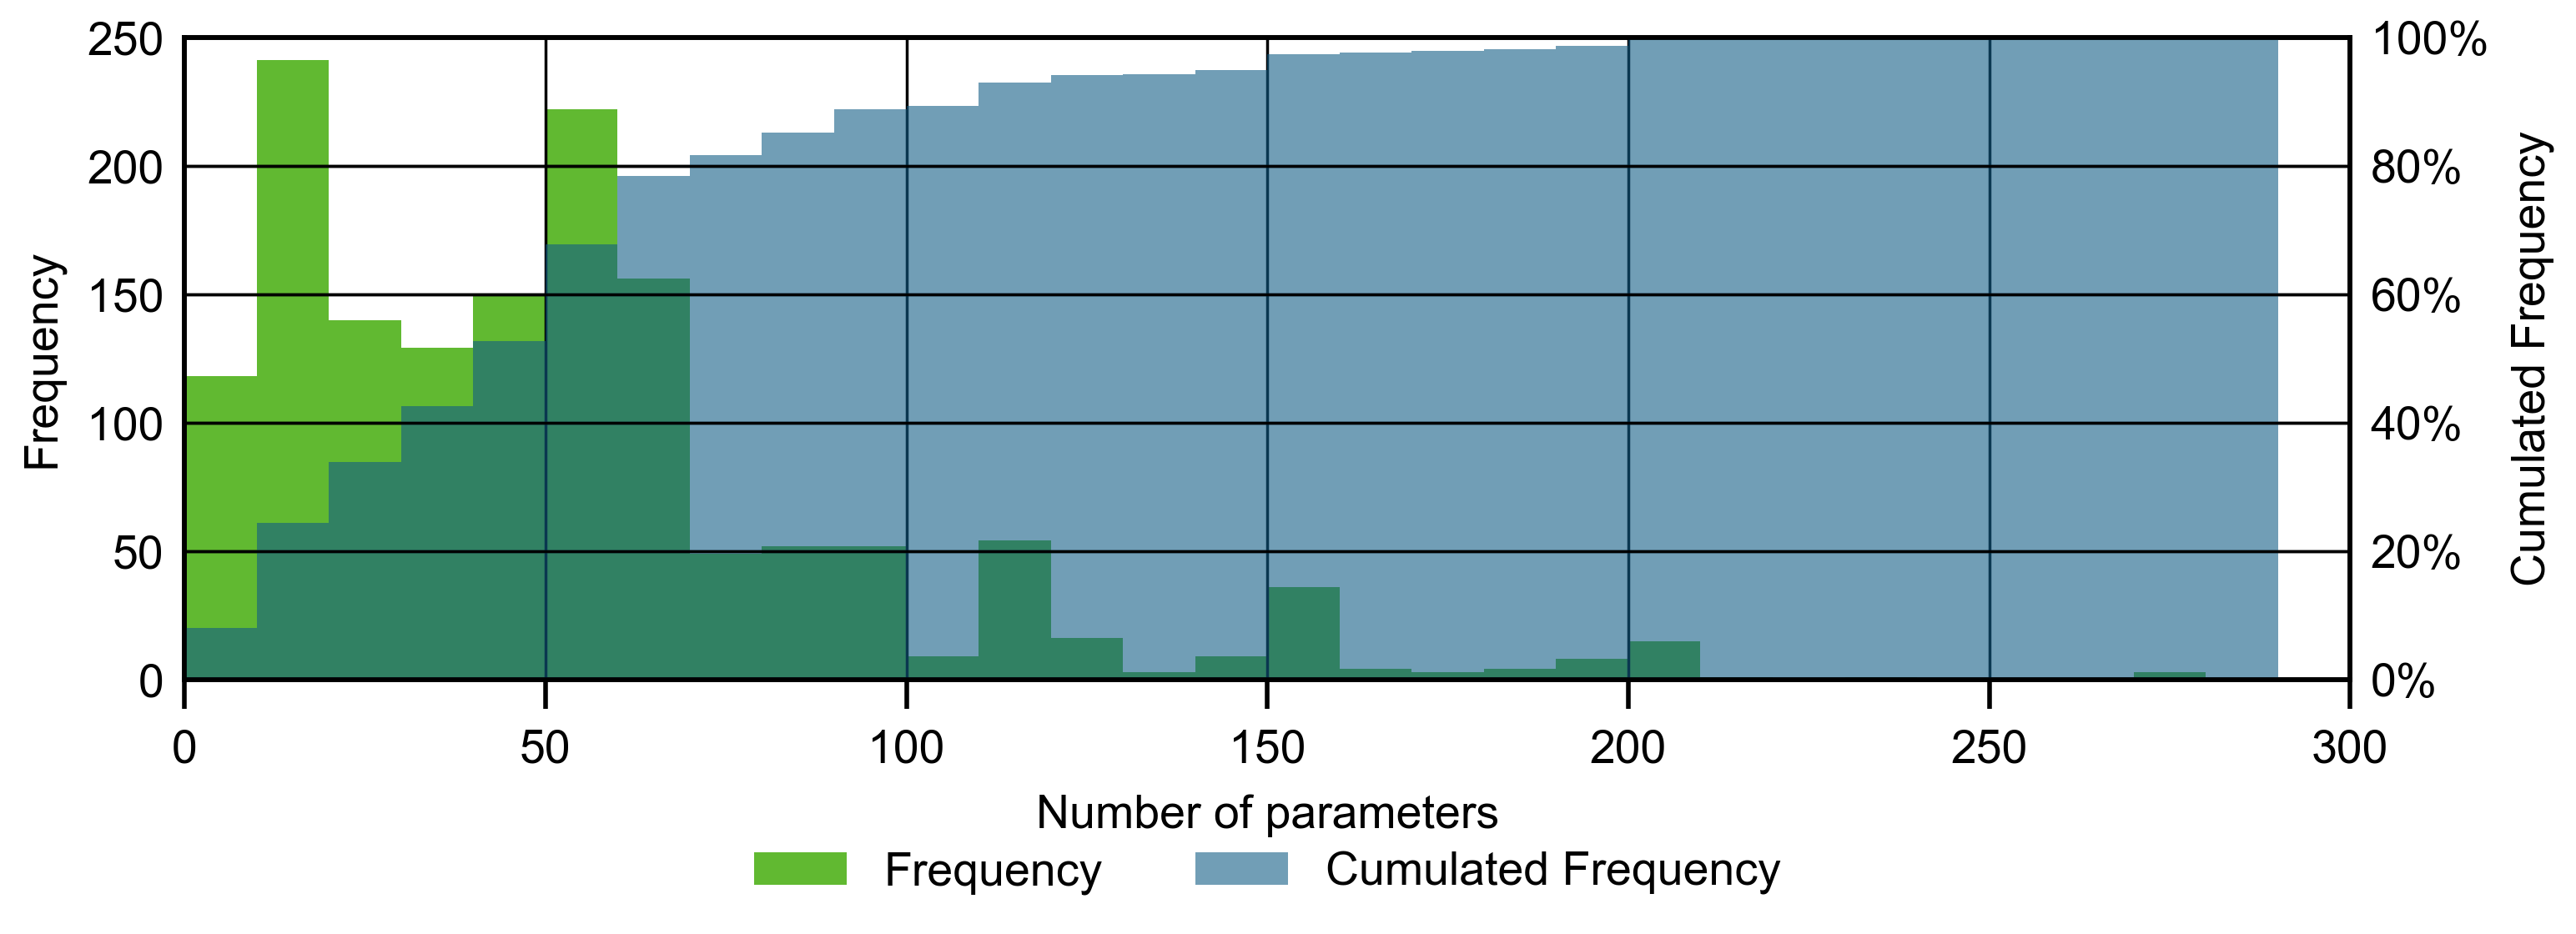

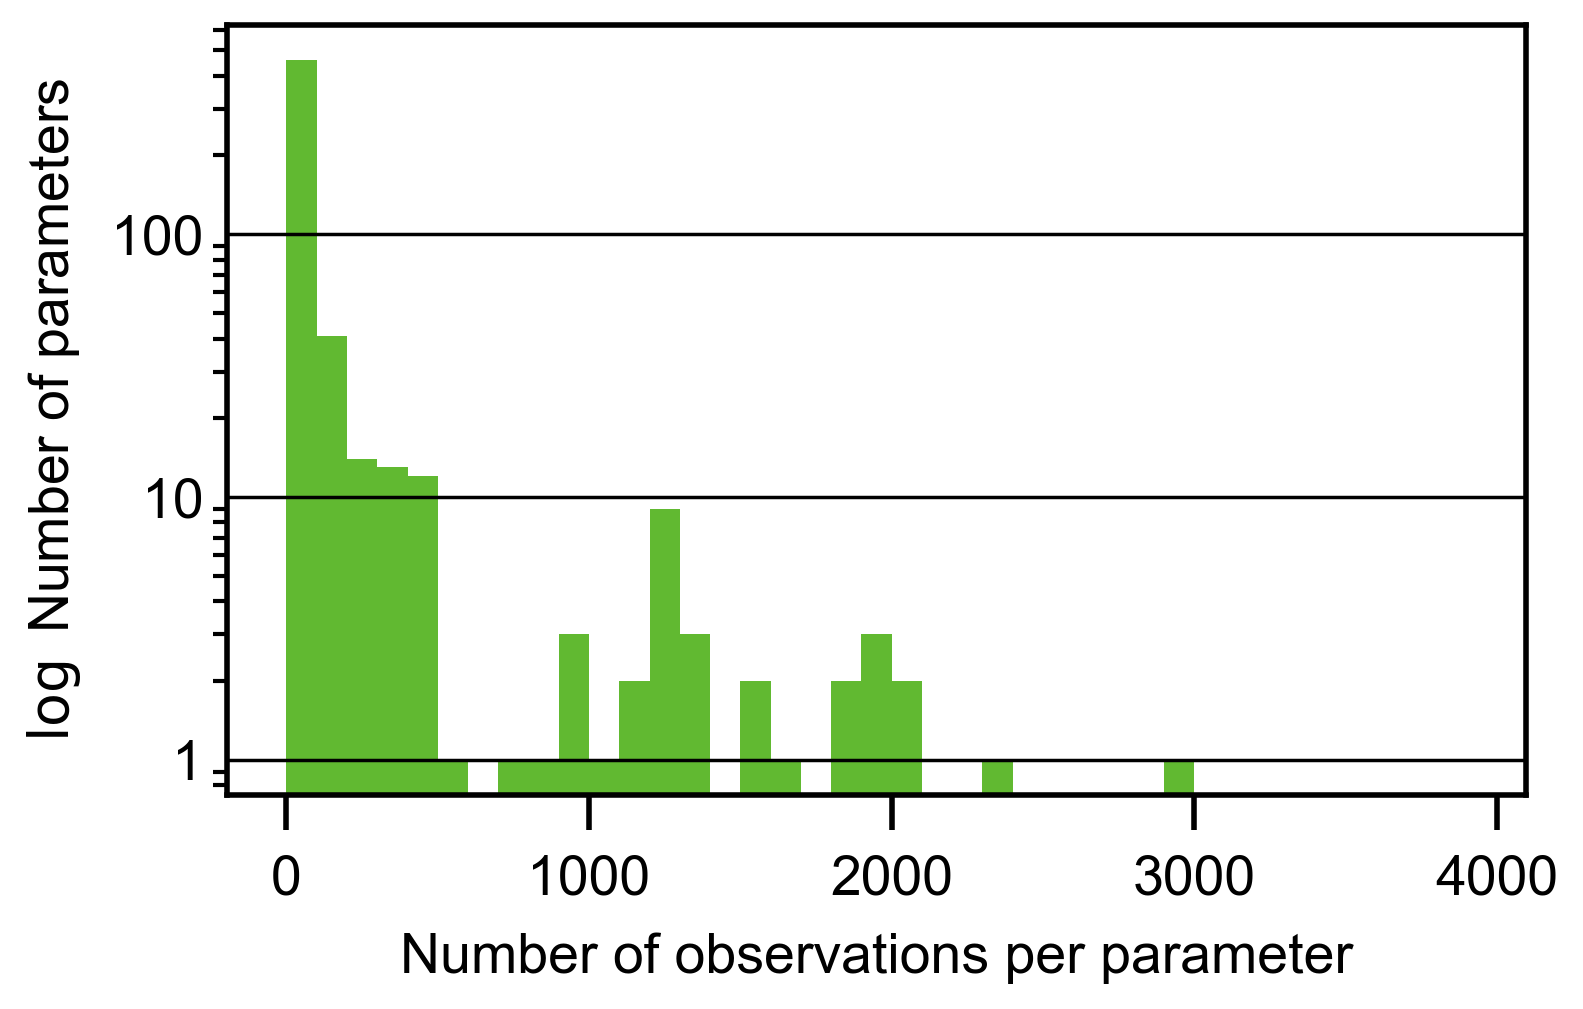

In [2]:
with OpenDB().session() as session:
    plot_summary(session=session)

## make violin plots of common organic and most common parameters in general

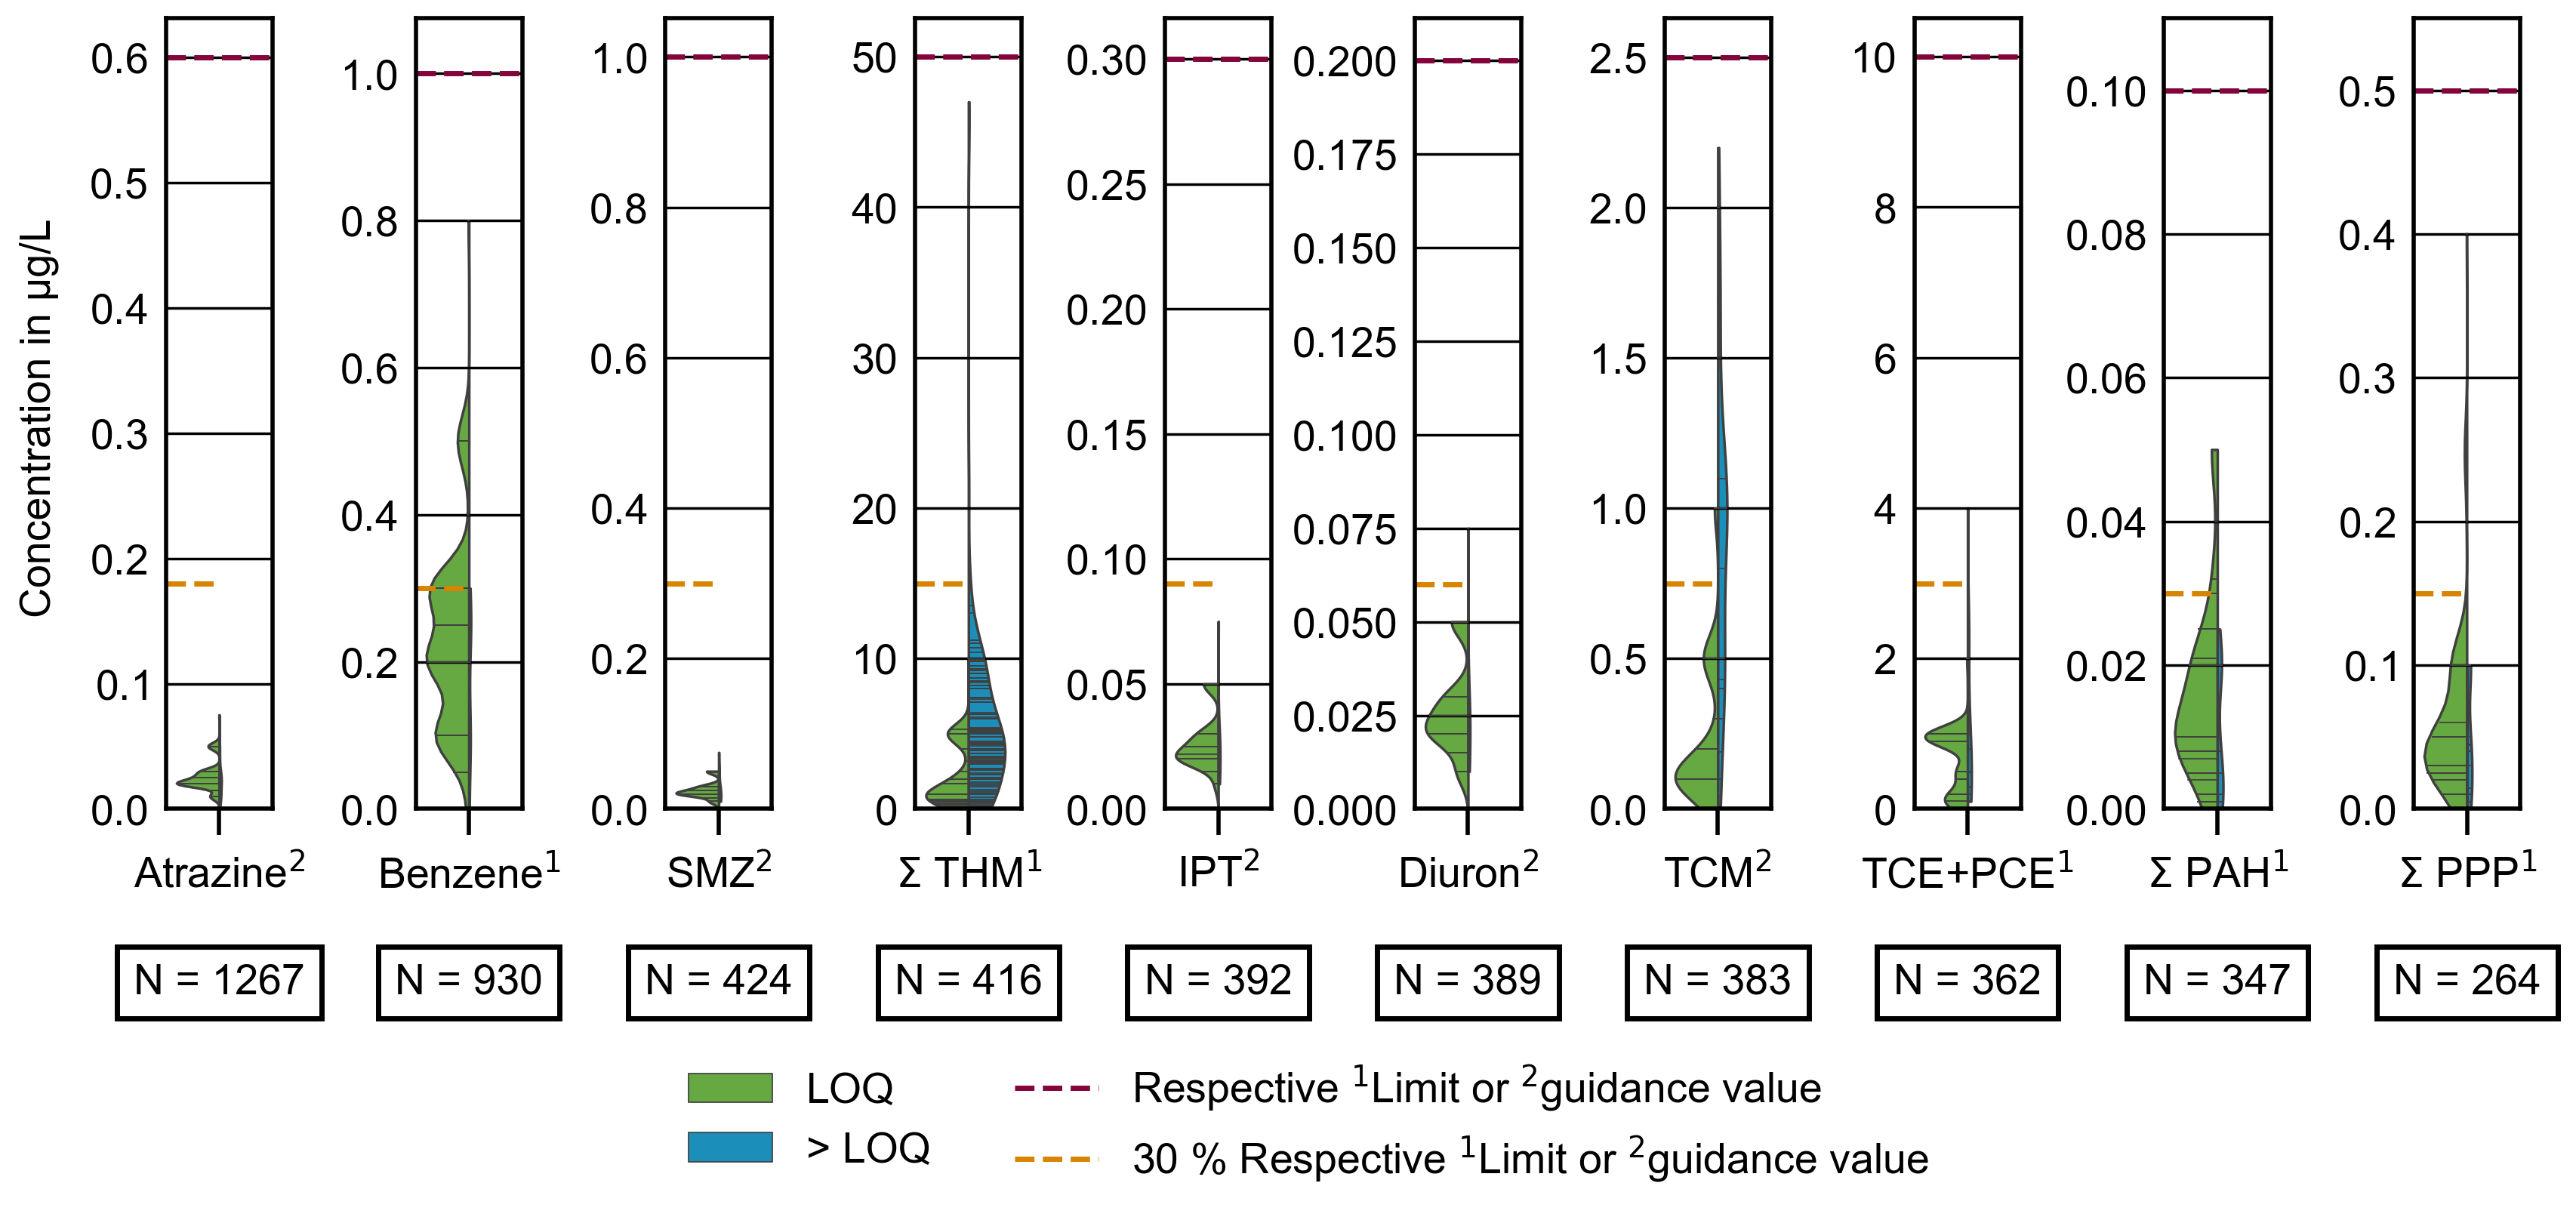

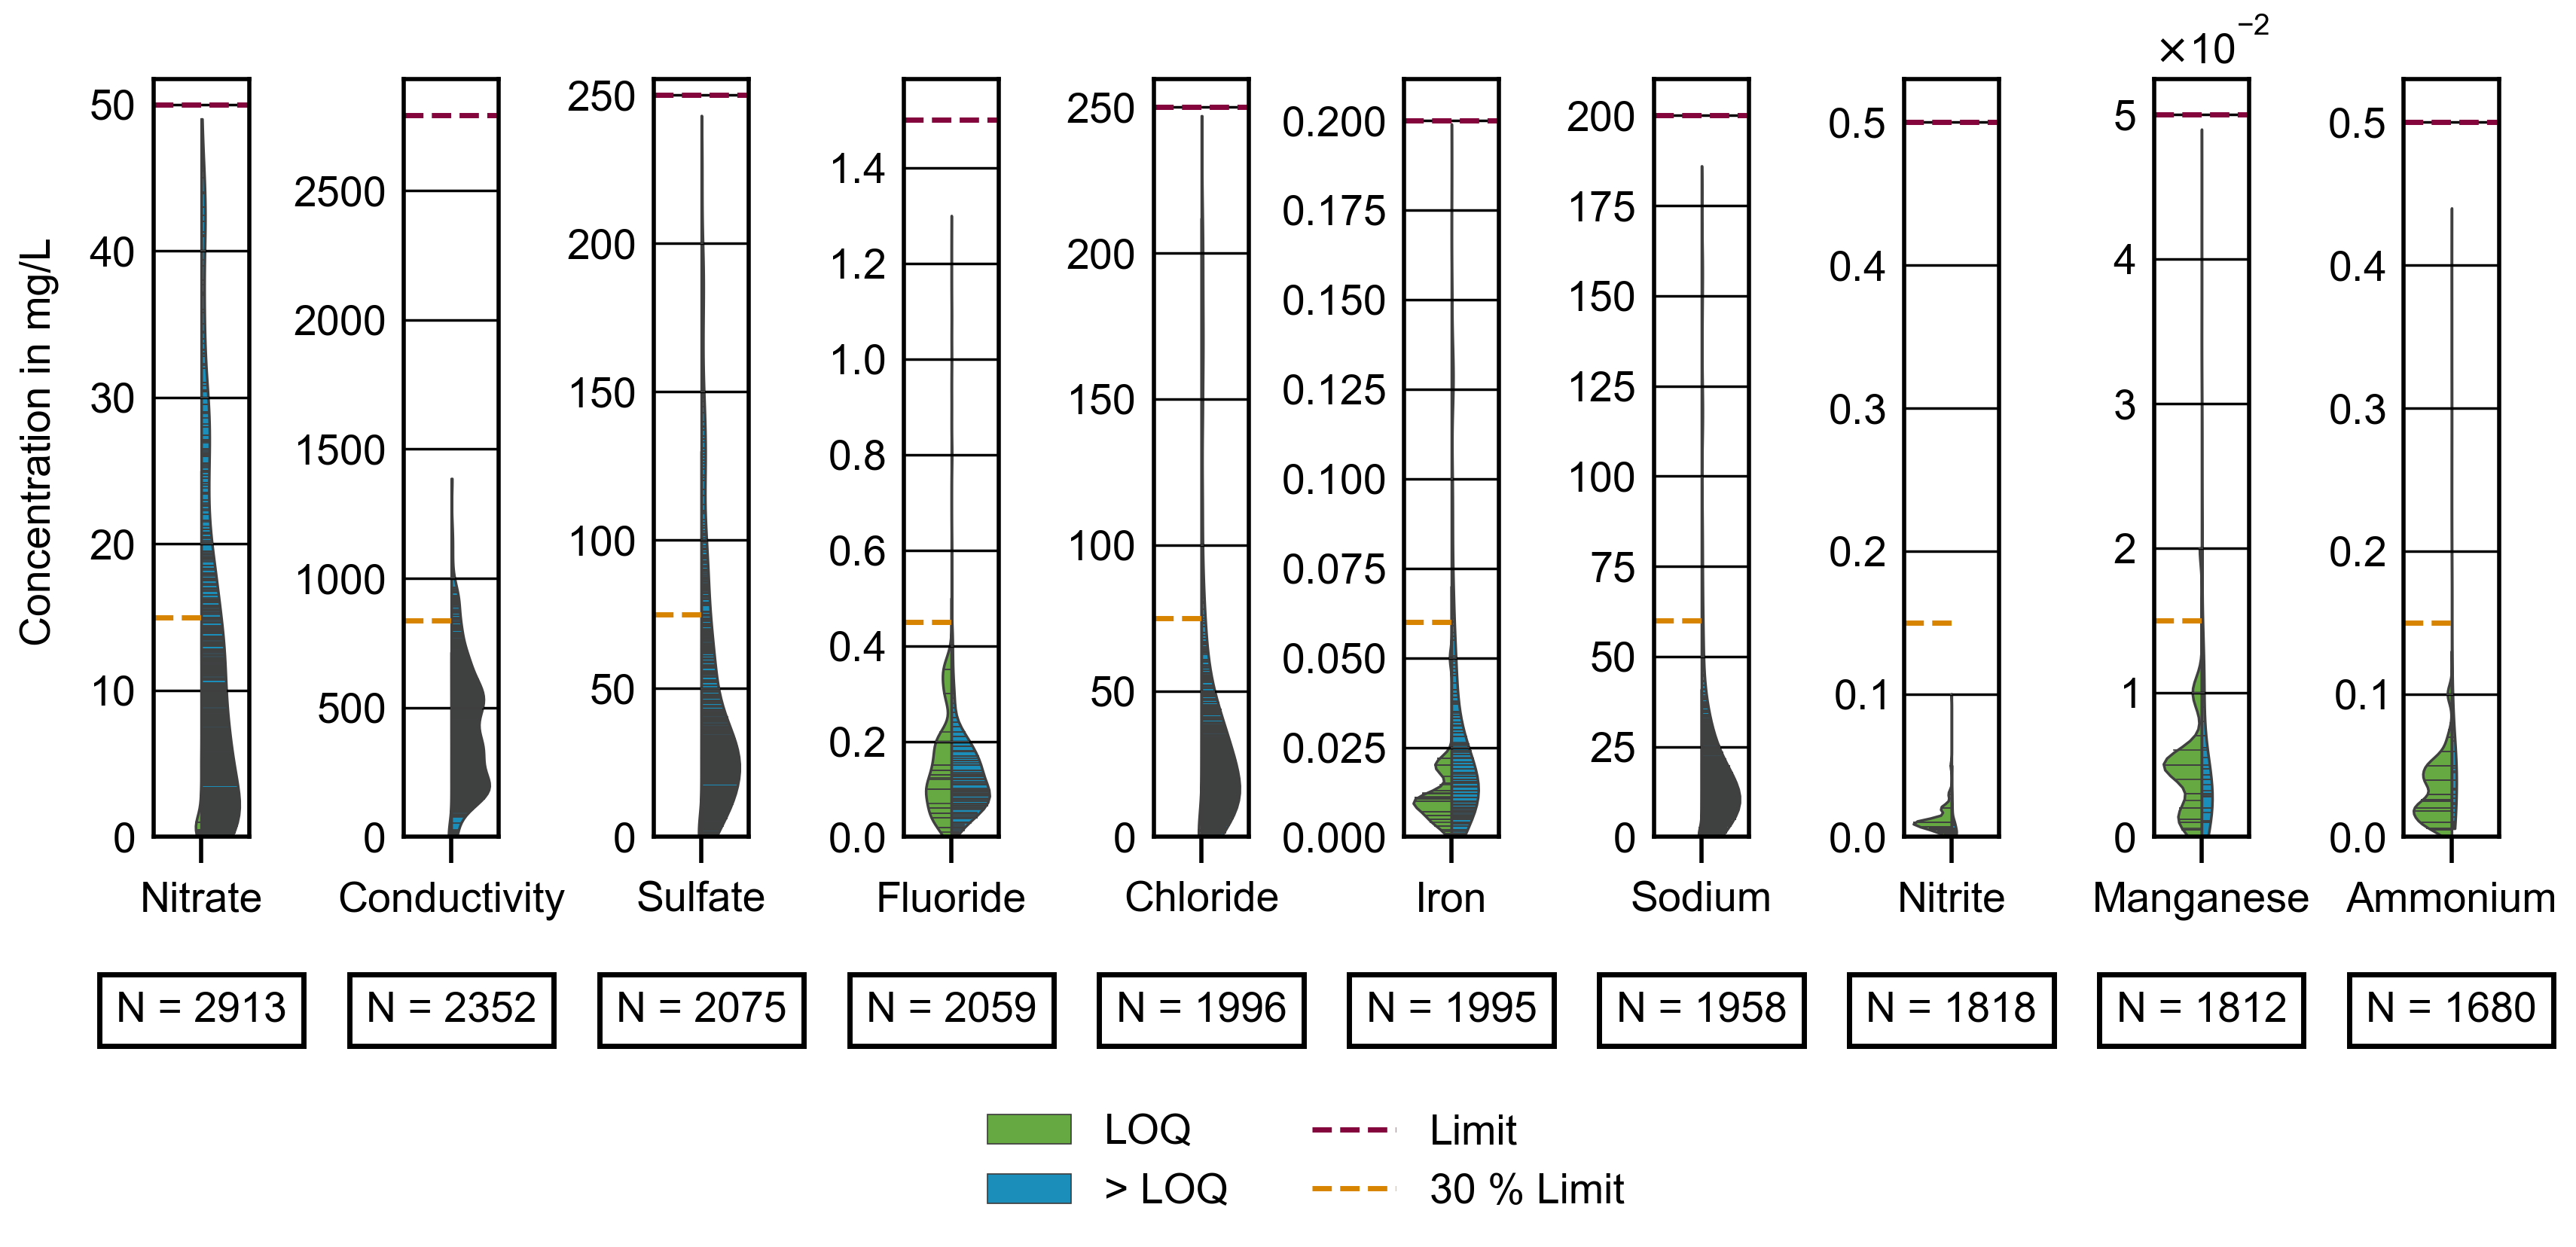

In [3]:
with OpenDB().session() as session:
    violin_common_org(session)
    violin_most_common(session)

## make geographic plots

g:\uba_wimi\1_tristo\4_skript_v2\tristo2\tristo\plotting\geoplot.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df.category == "> BG"].groupby("LAU").agg(agg),
g:\uba_wimi\1_tristo\4_skript_v2\tristo2\tristo\plotting\geoplot.py:63: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df.category == "BG"].groupby("LAU").agg(agg),
c:\Users\Leon\anaconda3\envs\tristo_fs\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
g:\uba_wimi\1_tristo\4_skript_v2\tristo2\tristo\plotting\geoplot.py:57: FutureWarn

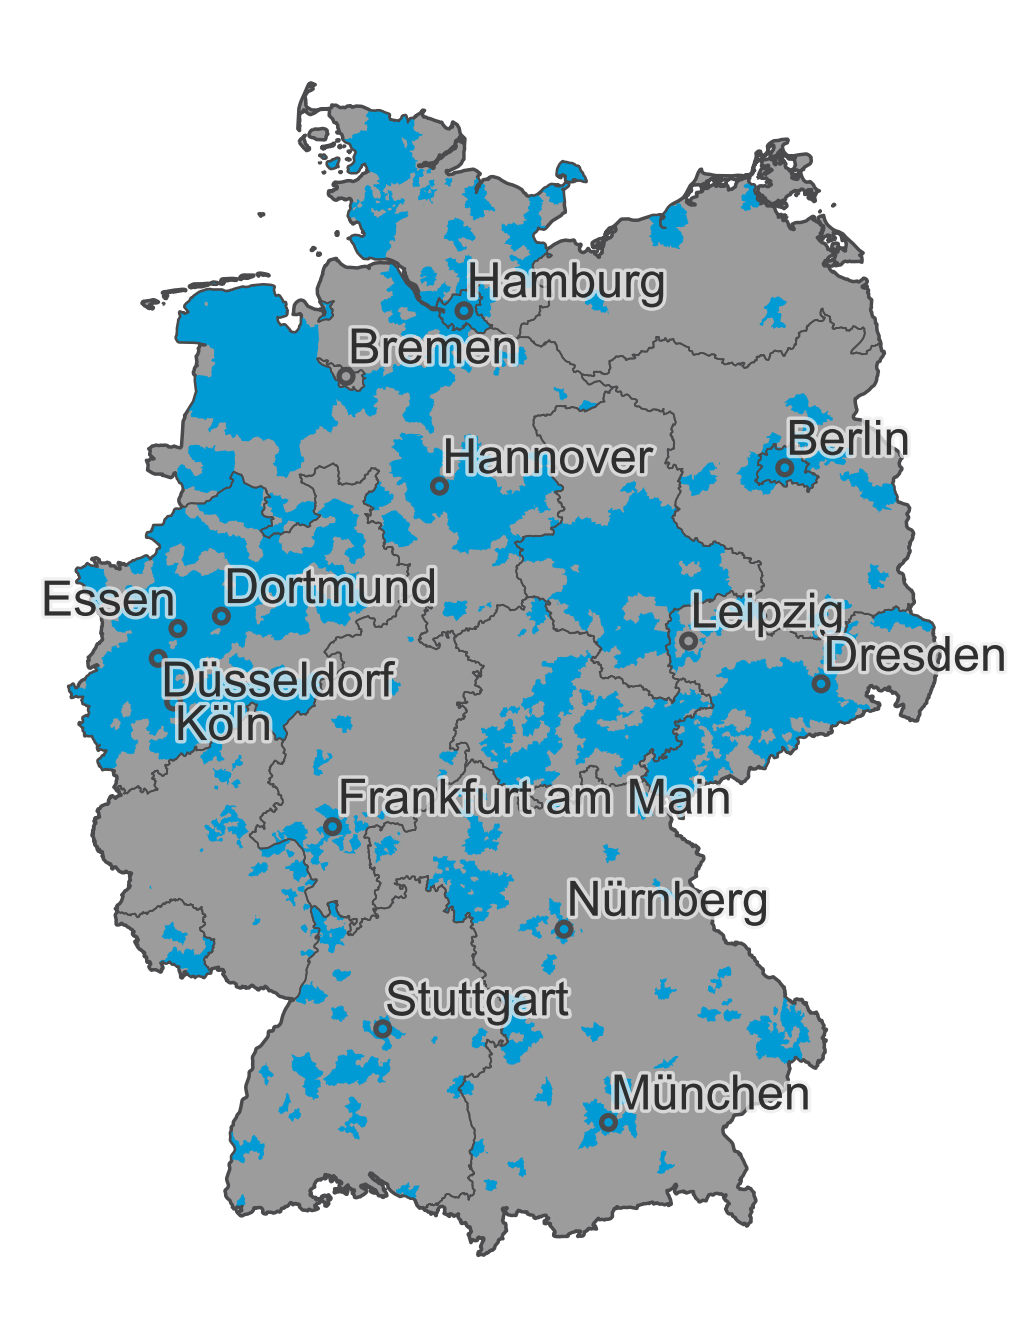

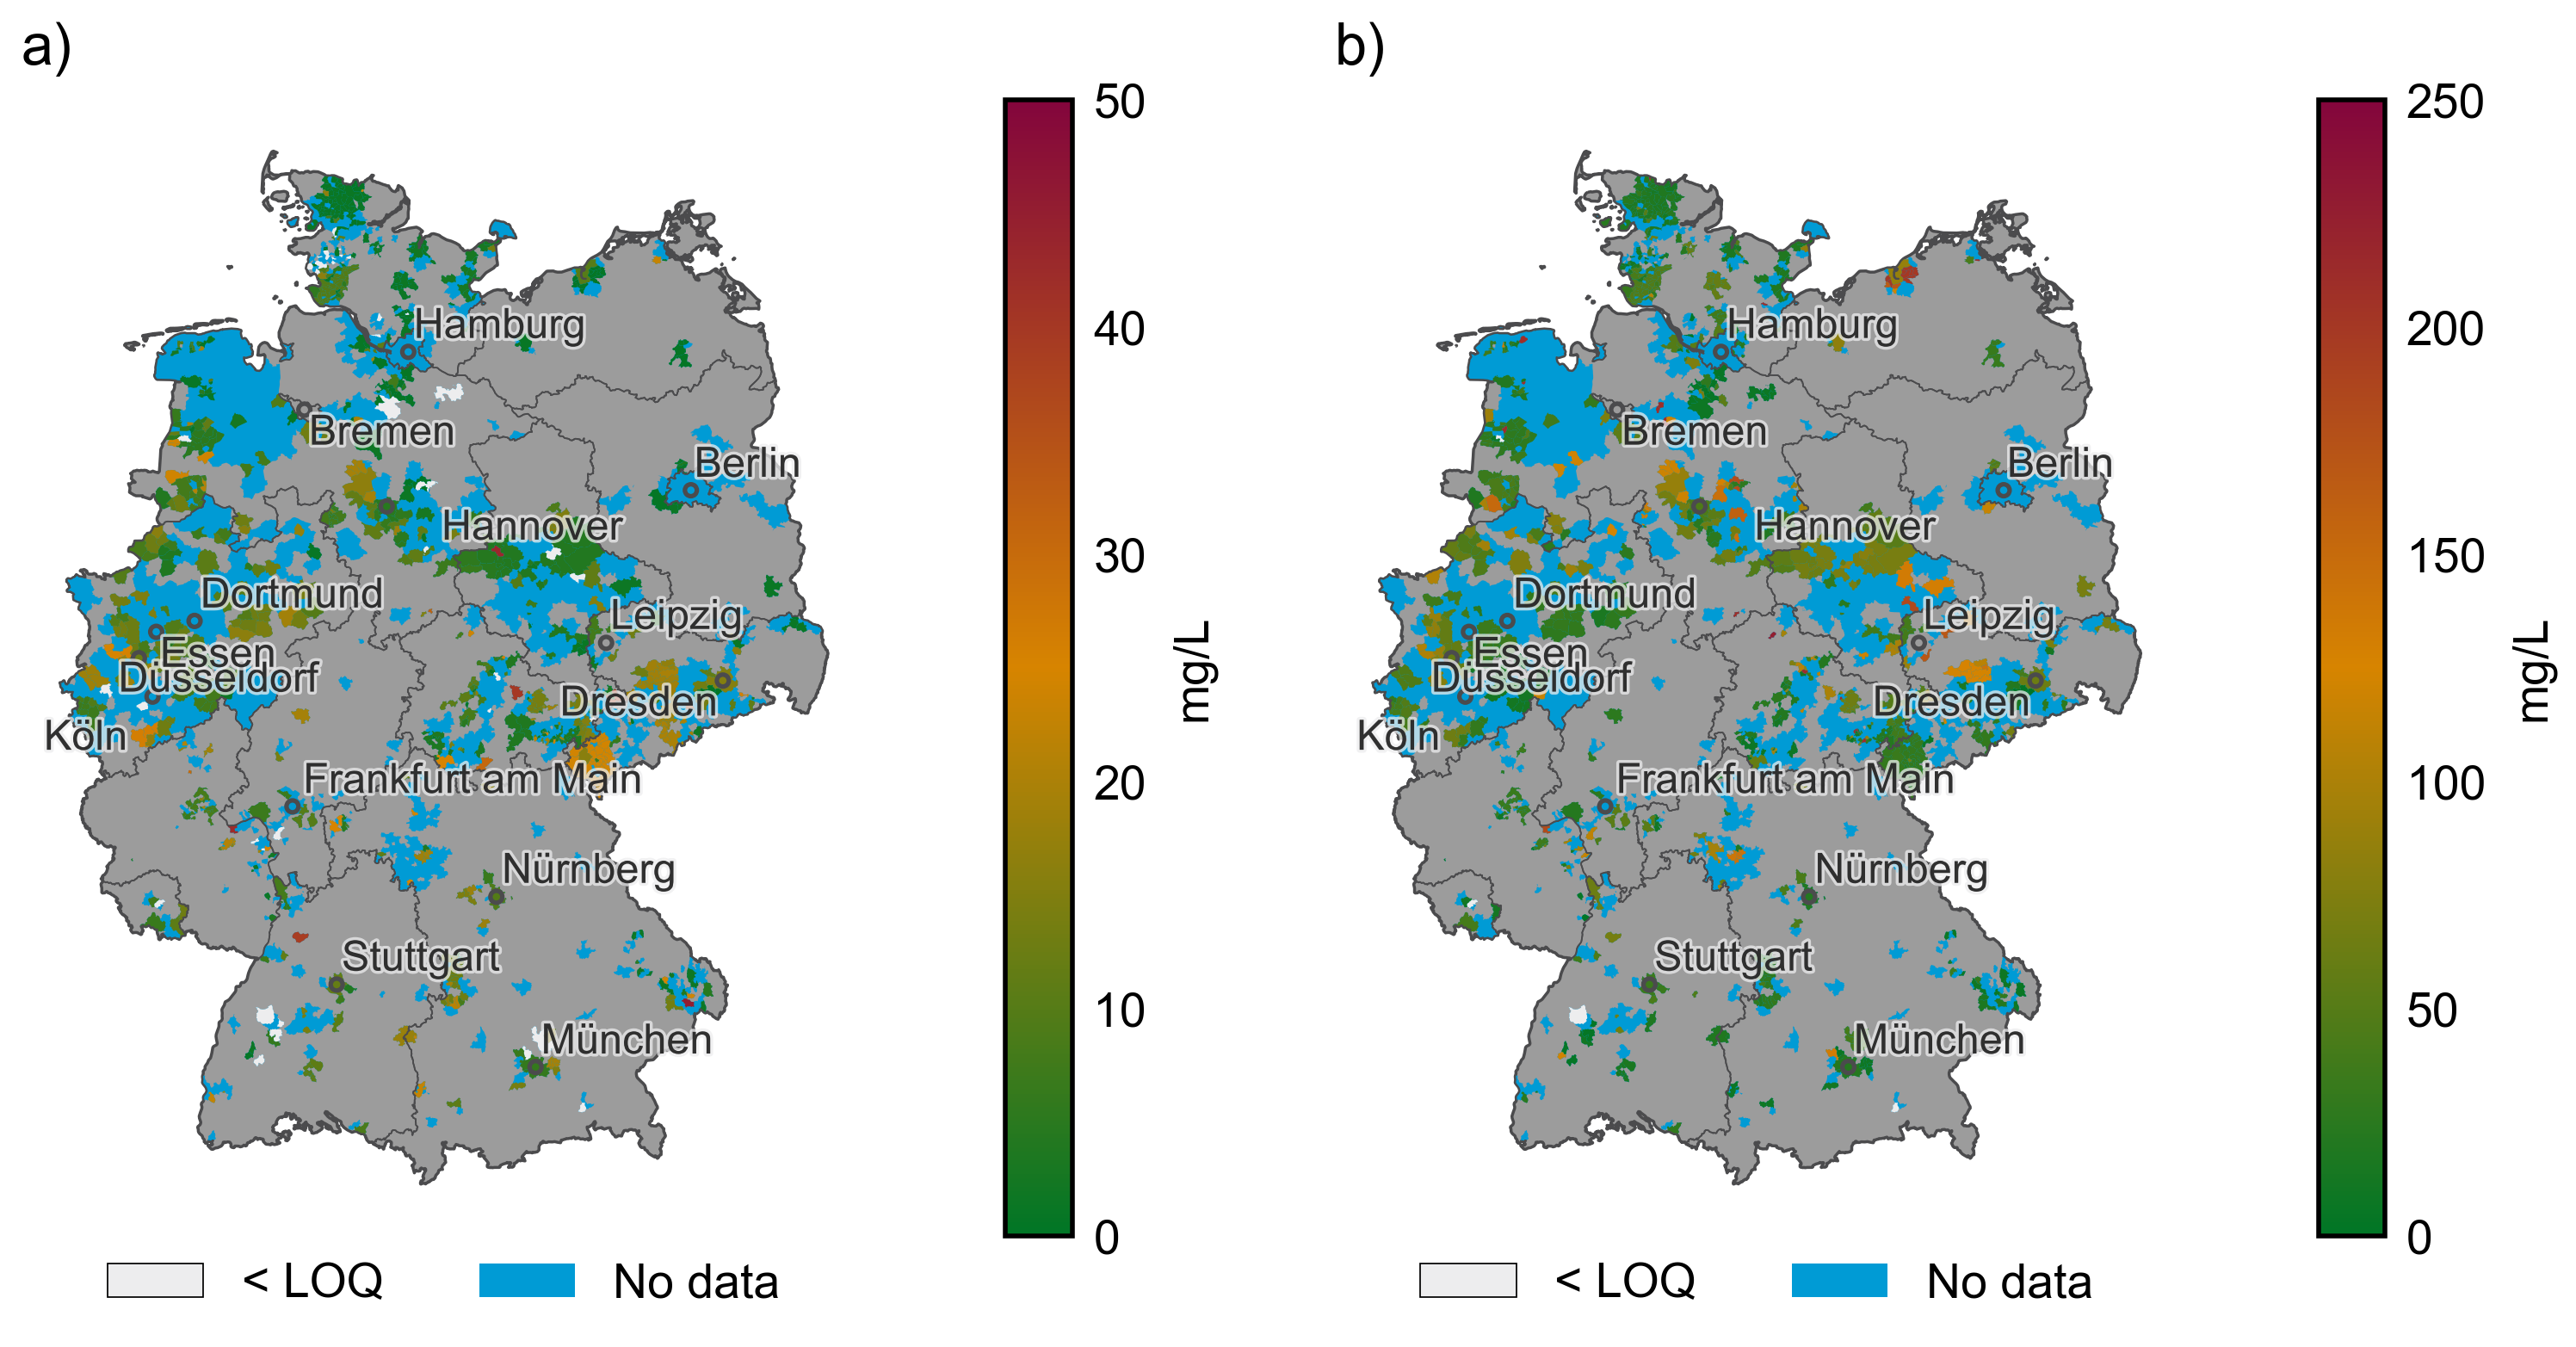

In [6]:
with OpenDB().session() as session:
    # bare map with investigated area
    fig, ax = plt.subplots()
    geoplot('WVG', 0, '', pd.DataFrame(columns= ['LAU', 'category','val']),session=session, show_cities=True, show_laus=True, ax = ax)
    fig.set_size_inches(3.35,3.35)
    fig.savefig(PATH_PLOTS / 'geo_WVG')


    # map with values on nitrate (11) and sulfate (46)
    fig, axs = plt.subplots(1,2)
    titles = ['a)','b)']
    param_ids = [11,46]
    for param_id, ax, title in zip(param_ids, axs, titles ):
        param, limit, unit, df = get_vals(param_id, session=session)
        geoplot(param, limit, unit, df, session, show_cities=True, show_laus=True,ax=ax)
        ax.set_title(title, loc='left')
    fig.tight_layout()
    fig.savefig(PATH_PLOTS / 'geo_NO3_SO4')
